## 참고자료

https://github.com/pycaret/pycaret/blob/master/tutorials/Tutorial%20-%20Regression.ipynb

## Detailed function-by-function overview

In [1]:
from pycaret.datasets import get_data
data = get_data('insurance')

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [2]:
# import pycaret regression and init setup
from pycaret.regression import *

## SetUp


- 설정 함수는 PyCaret에서 실험을 초기화하고 함수에서 전달된 모든 매개변수를 기반으로 변환 파이프라인을 생성합니다. 
- 설정 함수는 다른 함수를 실행하기 전에 반드시 호출해야 합니다. 
- 데이터와 대상이라는 두 가지 필수 파라미터가 필요합니다. 
- 다른 모든 파라미터는 선택 사항이며 데이터 전처리 파이프라인을 구성하는 데 사용됩니다.

In [3]:
s = setup(data, target = 'charges', session_id = 123)

,Description,Value
0,Session id,123
1,Target,charges
2,Target type,Regression
3,Original data shape,"(1338, 7)"
4,Transformed data shape,"(1338, 10)"
5,Transformed train set shape,"(936, 10)"
6,Transformed test set shape,"(402, 10)"
7,Ordinal features,2
8,Numeric features,3
9,Categorical features,3


In [4]:
# check available metrics used in CV
get_metrics()

,Name,Display Name,Score Function,Scorer,Target,Args,Greater is Better,Custom
ID,,,,,,,,
mae,MAE,MAE,<function mean_absolute_error at 0x147f12e50>,neg_mean_absolute_error,pred,{},False,False
mse,MSE,MSE,<function mean_squared_error at 0x147f1b040>,neg_mean_squared_error,pred,{},False,False
rmse,RMSE,RMSE,<function mean_squared_error at 0x147f1b040>,neg_root_mean_squared_error,pred,{'squared': False},False,False
r2,R2,R2,<function r2_score at 0x147f1b310>,r2,pred,{},True,False
rmsle,RMSLE,RMSLE,<function RMSLEMetricContainer.__init__.<local...,"make_scorer(root_mean_squared_log_error, great...",pred,{},False,False
mape,MAPE,MAPE,<function MAPEMetricContainer.__init__.<locals...,"make_scorer(mean_absolute_percentage_error, gr...",pred,{},False,False


## 구성

변환된 데이터셋, 랜덤스테이트 등 설정 함수에 의해 생성된 모든 변수에 액세스하려면 get_config 메서드를 사용할 수 있습니다.

In [5]:
# check all available config
get_config()

{'USI',
 'X',
 'X_test',
 'X_test_transformed',
 'X_train',
 'X_train_transformed',
 'X_transformed',
 '_available_plots',
 '_ml_usecase',
 'data',
 'dataset',
 'dataset_transformed',
 'exp_id',
 'exp_name_log',
 'fold_generator',
 'fold_groups_param',
 'fold_shuffle_param',
 'gpu_n_jobs_param',
 'gpu_param',
 'html_param',
 'idx',
 'is_multiclass',
 'log_plots_param',
 'logging_param',
 'memory',
 'n_jobs_param',
 'pipeline',
 'seed',
 'target_param',
 'test',
 'test_transformed',
 'train',
 'train_transformed',
 'transform_target_param',
 'variable_and_property_keys',
 'variables',
 'y',
 'y_test',
 'y_test_transformed',
 'y_train',
 'y_train_transformed',
 'y_transformed'}

In [6]:
# lets access X_train_transformed
get_config('X_train_transformed')

,age,sex,bmi,children,smoker,region_northeast,region_southwest,region_southeast,region_northwest
300,36.0,1.0,27.549999,3.0,0.0,1.0,0.0,0.0,0.0
904,60.0,0.0,35.099998,0.0,0.0,0.0,1.0,0.0,0.0
670,30.0,1.0,31.570000,3.0,0.0,0.0,0.0,1.0,0.0
617,49.0,1.0,25.600000,2.0,1.0,0.0,1.0,0.0,0.0
373,26.0,1.0,32.900002,2.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
1238,37.0,1.0,22.705000,3.0,0.0,1.0,0.0,0.0,0.0
1147,20.0,0.0,31.920000,0.0,0.0,0.0,0.0,0.0,1.0
106,19.0,0.0,28.400000,1.0,0.0,0.0,1.0,0.0,0.0
1041,18.0,1.0,23.084999,0.0,0.0,1.0,0.0,0.0,0.0


In [7]:
# another example: let's access seed
print("The current seed is: {}".format(get_config('seed')))

# now lets change it using set_config
set_config('seed', 786)
print("The new seed is: {}".format(get_config('seed')))

The current seed is: 123
The new seed is: 786


## setup 매개변수 지정

모든 전처리 구성과 실험 설정/파라미터는 설정 기능으로 전달됩니다. 사용 가능한 모든 파라미터를 보려면 문서 문자열을 확인하세요:

In [8]:
# init setup with normalize = True
s = setup(data, target = 'charges', session_id = 123,
          normalize = True, normalize_method = 'minmax')

,Description,Value
0,Session id,123
1,Target,charges
2,Target type,Regression
3,Original data shape,"(1338, 7)"
4,Transformed data shape,"(1338, 10)"
5,Transformed train set shape,"(936, 10)"
6,Transformed test set shape,"(402, 10)"
7,Ordinal features,2
8,Numeric features,3
9,Categorical features,3


<Axes: >

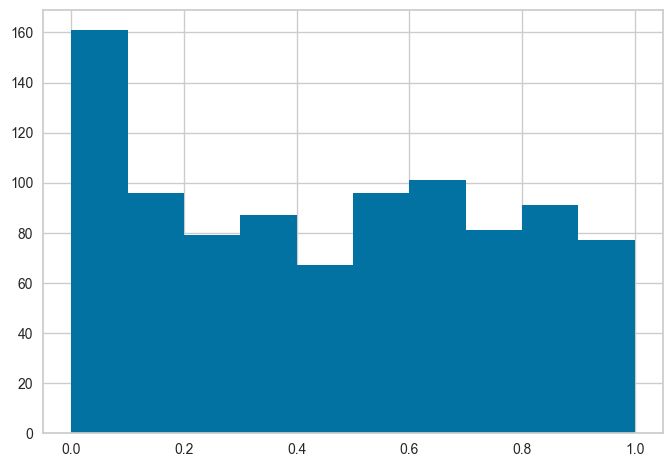

In [9]:
# lets check the X_train_transformed to see effect of params passed
get_config('X_train_transformed')['age'].hist()

<Axes: >

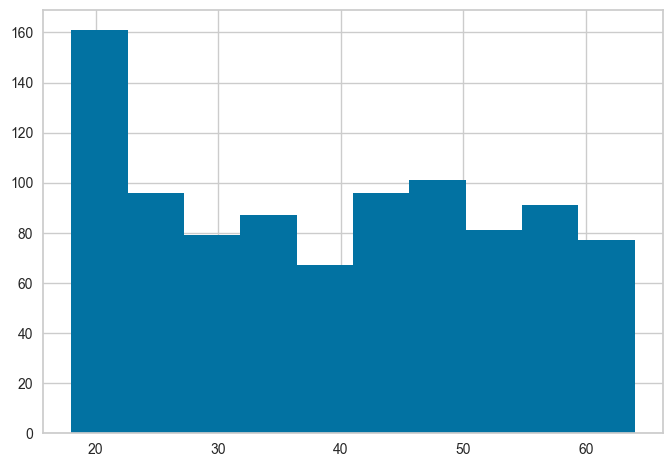

In [10]:
get_config('X_train')['age'].hist()

## Compare Models

compare_models 함수는 교차 검증을 사용하여 모델 라이브러리에서 사용할 수 있는 모든 추정기의 성능을 학습하고 평가합니다. 이 함수의 출력은 교차 검증 평균 점수가 포함된 점수 그리드입니다. CV 중에 평가된 지표는 get_metrics 함수를 사용하여 액세스할 수 있습니다. 사용자 지정 지표는 add_metric 및 remove_metric 함수를 사용하여 추가하거나 제거할 수 있습니다.


- Some other parameters that you might find very useful in compare_models are:

> fold
> cross_validation
> budget_time
> errors
> probability_threshold
> parallel

In [11]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2701.9135,23548622.1598,4832.9291,0.8320,0.4447,0.3137,0.0300
rf,Random Forest Regressor,2772.9195,25409792.9692,5028.1973,0.8173,0.4687,0.3298,0.0560
catboost,CatBoost Regressor,2899.4825,25762752.2096,5057.5778,0.8163,0.4815,0.3522,0.1370
lightgbm,Light Gradient Boosting Machine,3001.8884,25547324.5813,5044.5767,0.8147,0.5445,0.3784,0.3650
et,Extra Trees Regressor,2833.3624,28427844.2412,5305.6516,0.7991,0.4877,0.3363,0.0530
ada,AdaBoost Regressor,4175.5916,28401799.0579,5321.7006,0.7976,0.6263,0.7144,0.0210
xgboost,Extreme Gradient Boosting,3439.8892,32826514.4000,5711.7335,0.7626,0.6221,0.4465,0.0280
ridge,Ridge Regression,4296.0642,38392999.7849,6176.6160,0.7308,0.5710,0.4397,0.0160
lr,Linear Regression,4306.5510,38357972.4872,6174.6540,0.7307,0.5796,0.4426,0.2840
br,Bayesian Ridge,4300.6286,38387539.9069,6176.4192,0.7307,0.5881,0.4419,0.0160


In [12]:
# check available models
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


## 모델매개변수 지정

compare_models의 포함 및 제외 매개 변수를 사용하여 선택한 모델만 학습시키거나 제외 매개 변수에 모델 ID를 전달하여 특정 모델을 학습에서 제외할 수 있습니다.

In [13]:
compare_tree_models = compare_models(include = ['dt', 'rf', 'et', 'gbr', 'xgboost', 'lightgbm', 'catboost'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2701.9135,23548622.1598,4832.9291,0.8320,0.4447,0.3137,0.0310
rf,Random Forest Regressor,2772.9195,25409792.9692,5028.1973,0.8173,0.4687,0.3298,0.0290
catboost,CatBoost Regressor,2899.4825,25762752.2096,5057.5778,0.8163,0.4815,0.3522,0.0240
lightgbm,Light Gradient Boosting Machine,3001.8884,25547324.5813,5044.5767,0.8147,0.5445,0.3784,0.0260
et,Extra Trees Regressor,2833.3624,28427844.2412,5305.6516,0.7991,0.4877,0.3363,0.0320
xgboost,Extreme Gradient Boosting,3439.8892,32826514.4000,5711.7335,0.7626,0.6221,0.4465,0.1580
dt,Decision Tree Regressor,3399.1402,48100203.3847,6915.2984,0.6476,0.5629,0.4052,0.0250


In [14]:
compare_tree_models

GradientBoostingRegressor(random_state=123)

## 모델 : pull 함수 사용

위의 함수는 학습된 모델 객체를 출력으로 반환합니다. 채점 그리드는 표시만 되고 반환되지 않습니다. 채점 그리드에 액세스해야 하는 경우 풀 함수를 사용하여 데이터 프레임에 액세스할 수 있습니다.

In [15]:
compare_tree_models_results = pull()
compare_tree_models_results

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2701.9135,2.354862e+07,4832.9291,0.8320,0.4447,0.3137,0.031
rf,Random Forest Regressor,2772.9195,2.540979e+07,5028.1973,0.8173,0.4687,0.3298,0.029
catboost,CatBoost Regressor,2899.4825,2.576275e+07,5057.5778,0.8163,0.4815,0.3522,0.024
lightgbm,Light Gradient Boosting Machine,3001.8884,2.554732e+07,5044.5767,0.8147,0.5445,0.3784,0.026
et,Extra Trees Regressor,2833.3624,2.842784e+07,5305.6516,0.7991,0.4877,0.3363,0.032
xgboost,Extreme Gradient Boosting,3439.8892,3.282651e+07,5711.7335,0.7626,0.6221,0.4465,0.158
dt,Decision Tree Regressor,3399.1402,4.810020e+07,6915.2984,0.6476,0.5629,0.4052,0.025


## 모델 : sort, n_select 사용

기본적으로 compare_models는 sort 매개변수에 정의된 메트릭에 따라 가장 성능이 우수한 단일 모델을 반환합니다. MAE를 기준으로 상위 모델 3개를 반환하도록 코드를 변경해 보겠습니다.

In [16]:
best_mae_models_top3 = compare_models(sort = 'MAE', n_select = 3)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2701.9135,23548622.1598,4832.9291,0.8320,0.4447,0.3137,0.0330
rf,Random Forest Regressor,2772.9195,25409792.9692,5028.1973,0.8173,0.4687,0.3298,0.0330
et,Extra Trees Regressor,2833.3624,28427844.2412,5305.6516,0.7991,0.4877,0.3363,0.0320
catboost,CatBoost Regressor,2899.4825,25762752.2096,5057.5778,0.8163,0.4815,0.3522,0.0240
lightgbm,Light Gradient Boosting Machine,3001.8884,25547324.5813,5044.5767,0.8147,0.5445,0.3784,0.0250
dt,Decision Tree Regressor,3399.1402,48100203.3847,6915.2984,0.6476,0.5629,0.4052,0.0260
xgboost,Extreme Gradient Boosting,3439.8892,32826514.4000,5711.7335,0.7626,0.6221,0.4465,0.0240
huber,Huber Regressor,3461.7327,49057640.5613,6981.8576,0.6528,0.4815,0.2188,0.0240
par,Passive Aggressive Regressor,3536.1733,48501878.1363,6940.1967,0.6566,0.4785,0.2154,0.0300
knn,K Neighbors Regressor,3778.4582,38143971.2000,6165.0463,0.7277,0.5027,0.3690,0.0240


In [17]:
# list of top 3 models by MAE
best_mae_models_top3

[GradientBoostingRegressor(random_state=123),
 RandomForestRegressor(n_jobs=-1, random_state=123),
 ExtraTreesRegressor(n_jobs=-1, random_state=123)]

## Experiment Logging

- PyCaret은 다양한 유형의 실험 로거와 통합됩니다(기본값 = 'mlflow'). 

- PyCaret에서 실험 추적을 켜려면 log_experiment 및 experiment_name 매개변수를 설정하면 됩니다. 

- 그러면 정의된 로거를 기반으로 모든 메트릭, 하이퍼파라미터 및 아티팩트를 자동으로 추적합니다.

In [18]:
# from pycaret.regression import *
# s = setup(data, target = 'charges', log_experiment='mlflow', experiment_name='insurance_experiment')

In [19]:
# compare models
# best = compare_models()

In [20]:
# start mlflow server on localhost:5000
# !mlflow ui

## Create Model

- create_model 함수는 교차 검증을 사용하여 주어진 추정기의 성능을 훈련하고 평가합니다. 
- 이 함수의 출력은 배수별 CV 점수가 포함된 점수 그리드입니다.
- CV 중에 평가된 지표는 get_metrics 함수를 사용하여 액세스할 수 있습니다. 
- 사용자 지정 지표는 add_metric 및 remove_metric 함수를 사용하여 추가하거나 제거할 수 있습니다. 
- 사용 가능한 모든 모델은 models 함수를 사용하여 액세스할 수 있습니다.

In [21]:
# check all the available models
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [22]:
# train linear regression with default fold=10
lr = create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,4222.9616,33775764.3432,5811.6920,0.7983,0.4879,0.4328
1,4522.5819,43620030.5192,6604.5462,0.7464,0.5473,0.4216
2,3853.0378,31981107.9602,5655.1842,0.5951,0.7108,0.4398
3,3769.2427,26720539.9332,5169.1914,0.7769,0.5026,0.5276
4,4484.2122,43828444.1000,6620.3054,0.6740,0.5761,0.3847
5,4111.4638,35853416.0402,5987.7722,0.7694,0.5463,0.4131
6,4098.0868,39631320.0598,6295.3411,0.7303,0.5745,0.4266
7,4840.1792,45609236.3353,6753.4611,0.7492,0.5322,0.3974
8,4585.2940,40332830.6334,6350.8134,0.7395,0.5935,0.5036


In [23]:
lr_results = pull()
print(type(lr_results))
lr_results

<class 'pandas.core.frame.DataFrame'>


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,4222.9616,3.377576e+07,5811.6920,0.7983,0.4879,0.4328
1,4522.5819,4.362003e+07,6604.5462,0.7464,0.5473,0.4216
2,3853.0378,3.198111e+07,5655.1842,0.5951,0.7108,0.4398
3,3769.2427,2.672054e+07,5169.1914,0.7769,0.5026,0.5276
4,4484.2122,4.382844e+07,6620.3054,0.6740,0.5761,0.3847
5,4111.4638,3.585342e+07,5987.7722,0.7694,0.5463,0.4131
6,4098.0868,3.963132e+07,6295.3411,0.7303,0.5745,0.4266
7,4840.1792,4.560924e+07,6753.4611,0.7492,0.5322,0.3974
8,4585.2940,4.033283e+07,6350.8134,0.7395,0.5935,0.5036


In [24]:
# train linear regression with fold=3
lr = create_model('lr', fold=3)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,4162.4929,35267554.2025,5938.6492,0.7487,0.6038,0.4560
1,4188.5128,38861542.6082,6233.9027,0.7240,0.5331,0.4177
2,4587.7646,40774290.8018,6385.4750,0.7492,0.8263,0.4636
Mean,4312.9234,38301129.2042,6186.0090,0.7406,0.6544,0.4458
Std,194.6321,2282773.8070,185.5329,0.0118,0.1249,0.0201


In [25]:
# train linear regression with specific model parameters
create_model('lr', fit_intercept = False)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,4222.9616,33775764.3432,5811.6920,0.7983,0.4879,0.4328
1,4522.5819,43620030.5192,6604.5462,0.7464,0.5473,0.4216
2,3853.0378,31981107.9602,5655.1842,0.5951,0.7108,0.4398
3,3707.7705,26513348.5760,5149.1114,0.7786,0.4891,0.5164
4,4484.2122,43828444.1000,6620.3054,0.6740,0.5761,0.3847
5,4113.6222,35882341.9810,5990.1871,0.7692,0.5464,0.4130
6,4098.0868,39631320.0598,6295.3411,0.7303,0.5745,0.4266
7,4833.7747,45739275.7172,6763.0818,0.7485,0.5887,0.3967
8,4621.0616,40681916.3737,6378.2377,0.7372,0.7032,0.5225


LinearRegression(fit_intercept=False, n_jobs=-1)

In [26]:
# train lr and return train score as well alongwith CV
create_model('lr', return_train_score=True)

LinearRegression(n_jobs=-1)

### Some other parameters that you might find very useful in create_model are:

- cross_validation
- engine
- fit_kwargs
- groups

## Tune Model